## Analyzing Ad Click Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!kaggle datasets download marius2303/ad-click-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset
License(s): apache-2.0
100% 81.2k/81.2k [00:00<00:00, 706kB/s]
100% 81.2k/81.2k [00:00<00:00, 703kB/s]


In [3]:
import zipfile

with zipfile.ZipFile('ad-click-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [4]:
ad_data = pd.read_csv('/content/data/ad_click_dataset.csv')

#### Basic EDA

In [5]:
ad_data.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [9]:
# summary statistics
ad_data.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [10]:
# shape
ad_data.shape

(10000, 9)

In [6]:
# checking data types
data_types = ad_data.dtypes
print(data_types)

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object


In [7]:
# checking for duplicates
duplicates = ad_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2853


In [13]:
# checking for missing values
missing_values = ad_data.isnull().sum()
print("Missing values: ")
print(missing_values)

Missing values: 
id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


In [14]:
# Drop rows with any missing values
ad_data = ad_data.dropna()

# Drop columns with any missing values
ad_data = ad_data.dropna(axis=1)

#### Data Analysis

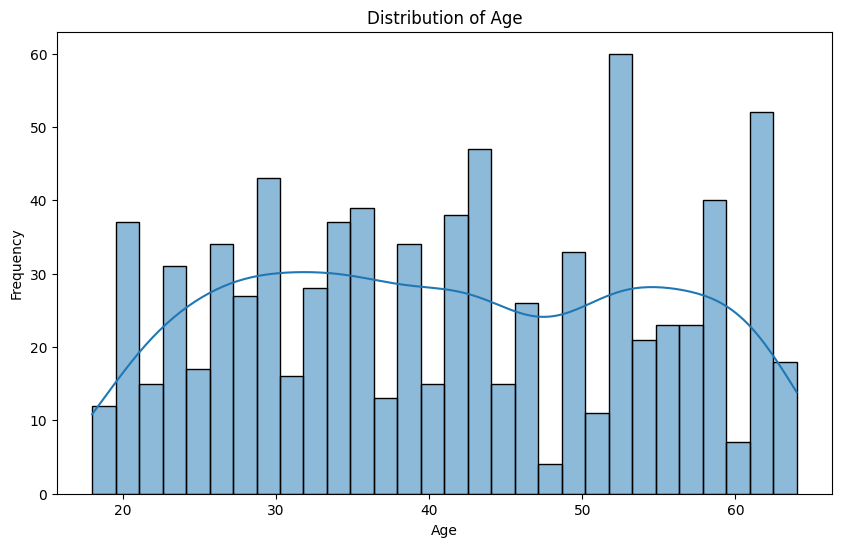

In [15]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(ad_data['age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

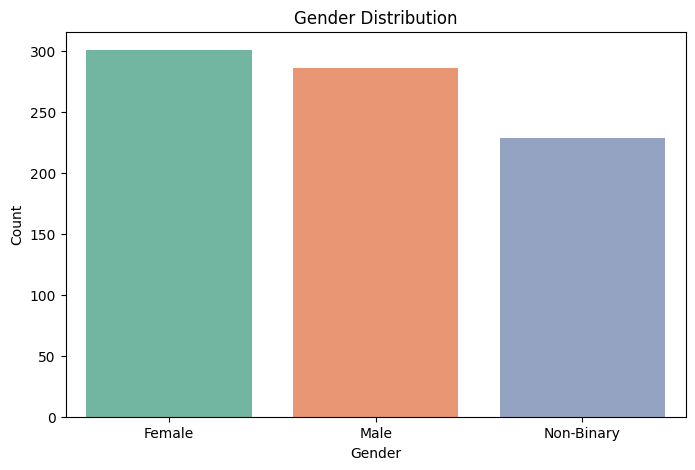

In [25]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=ad_data, hue = 'gender', legend=False, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

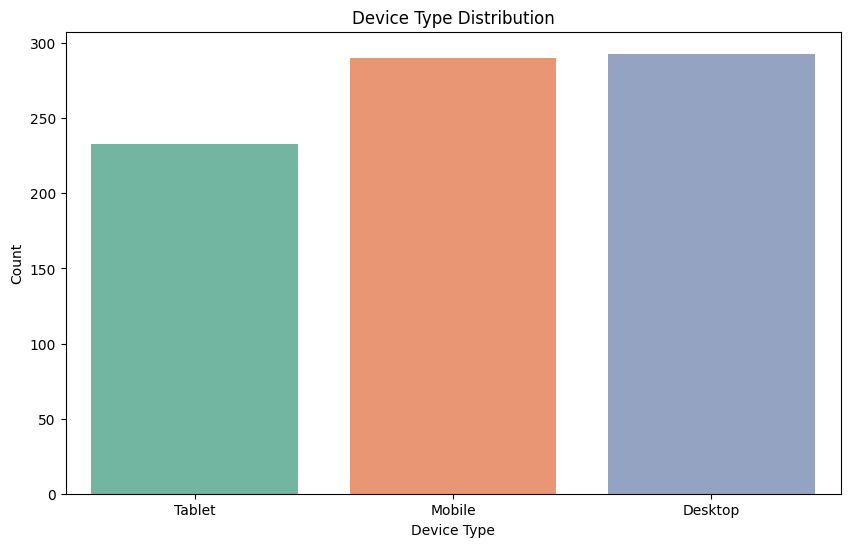

In [22]:
# Device type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', data=ad_data, hue = 'device_type', palette='Set2')
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

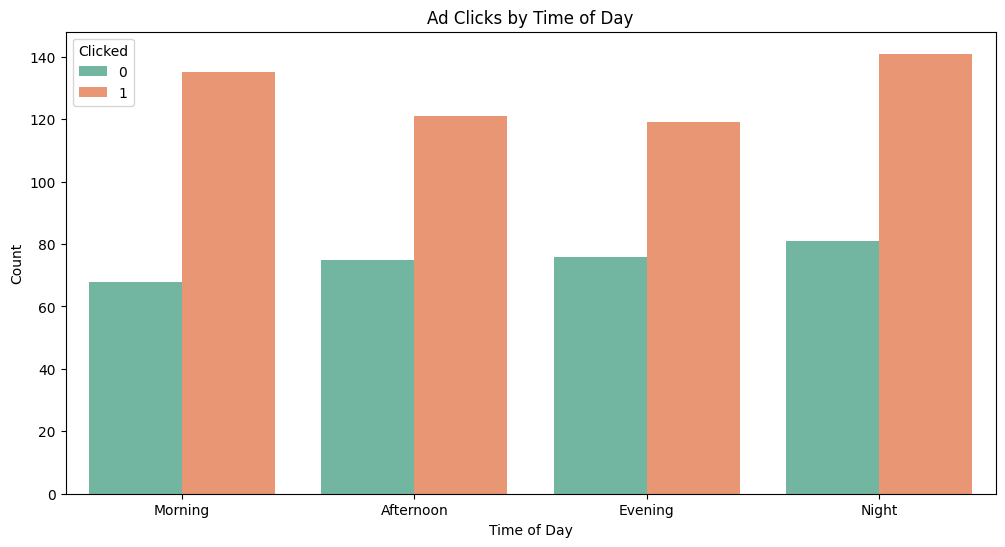

In [27]:
# Ad clicks by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_day', hue='click', data=ad_data, palette='Set2')
plt.title('Ad Clicks by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Clicked')
plt.show()

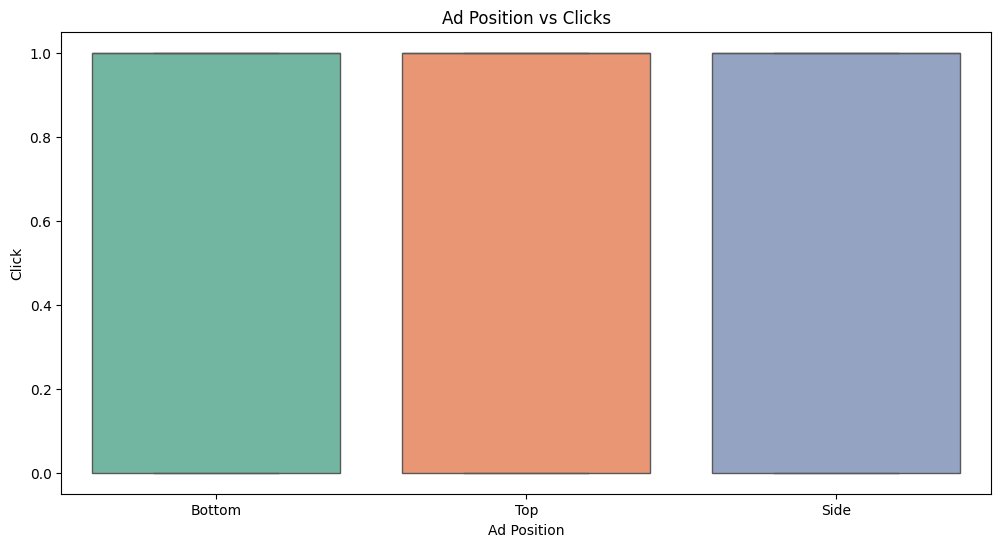

In [28]:
# Ad position vs clicks
plt.figure(figsize=(12, 6))
sns.boxplot(x='ad_position', y='click', hue='ad_position', data=ad_data, legend=False, palette='Set2')
plt.title('Ad Position vs Clicks')
plt.xlabel('Ad Position')
plt.ylabel('Click')
plt.show()

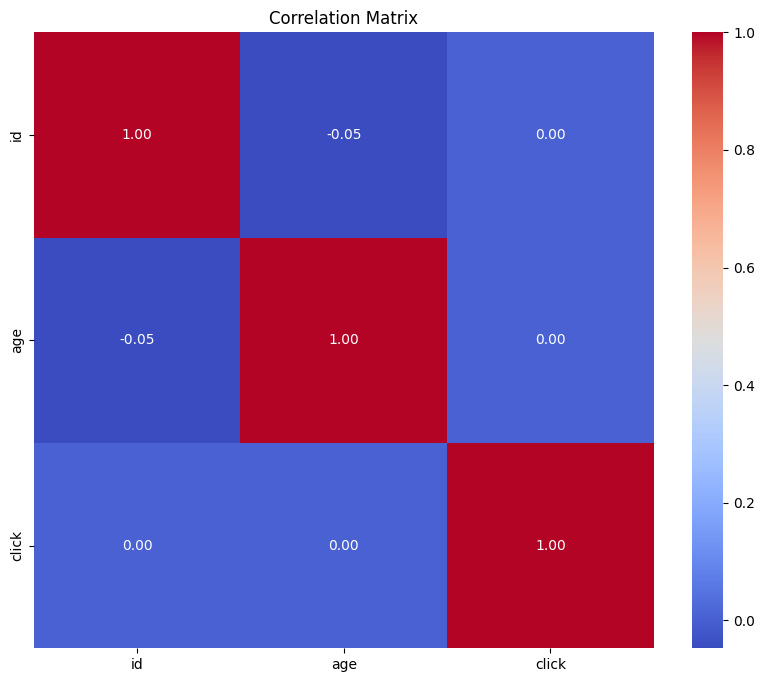

In [29]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = ad_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

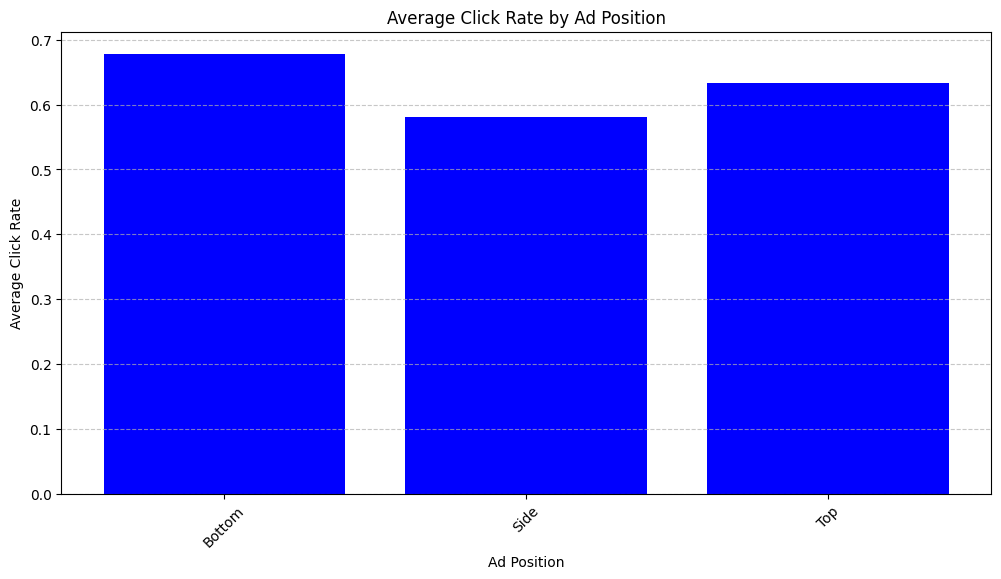

In [32]:
# Count of clicks by ad position
plt.figure(figsize=(12, 6))
ad_position_clicks = ad_data.groupby('ad_position')['click'].mean().reset_index()
plt.bar(ad_position_clicks['ad_position'], ad_position_clicks['click'], color='blue')
plt.title('Average Click Rate by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

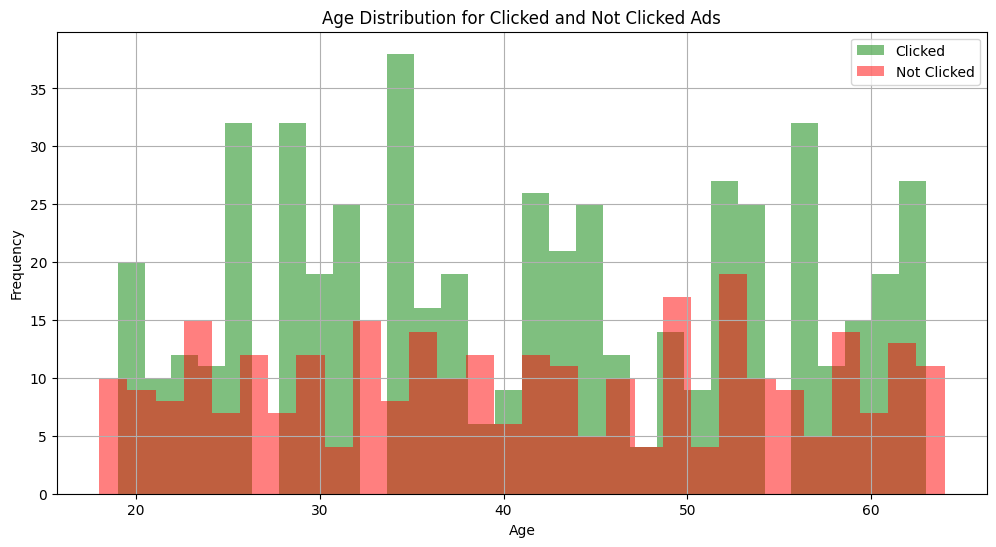

In [31]:
# Age distribution for clicked vs not clicked
plt.figure(figsize=(12, 6))
plt.hist(ad_data[ad_data['click'] == 1]['age'].dropna(), bins=30, alpha=0.5, label='Clicked', color='green')
plt.hist(ad_data[ad_data['click'] == 0]['age'].dropna(), bins=30, alpha=0.5, label='Not Clicked', color='red')
plt.title('Age Distribution for Clicked and Not Clicked Ads')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

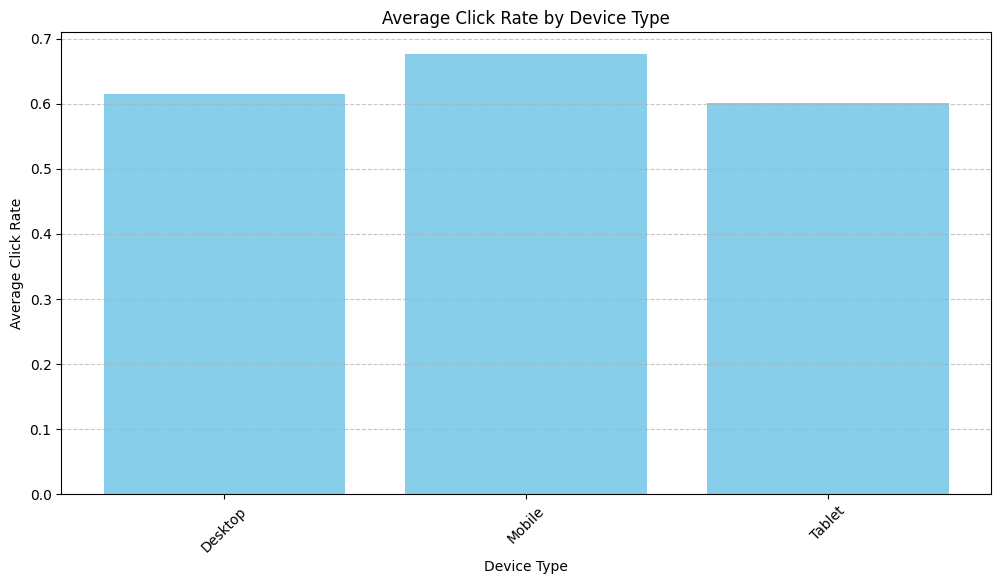

In [34]:
# Clicks by device type
plt.figure(figsize=(12, 6))
device_clicks = ad_data.groupby('device_type')['click'].mean().reset_index()
plt.bar(device_clicks['device_type'], device_clicks['click'], color='skyblue')
plt.title('Average Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

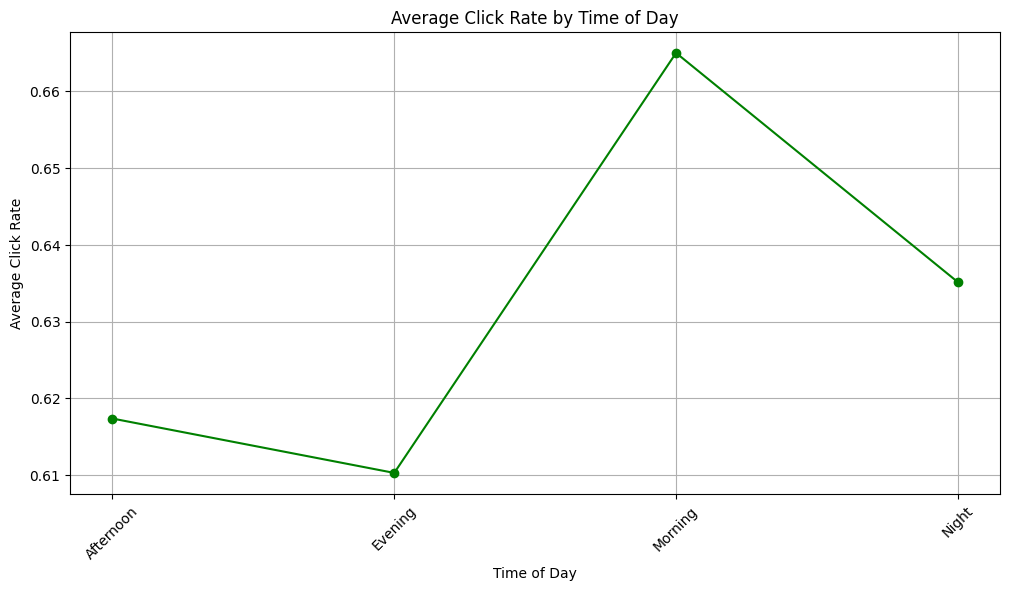

In [36]:
# Clicks distribution by time of day
plt.figure(figsize=(12, 6))
time_clicks = ad_data.groupby('time_of_day')['click'].mean().reset_index()
plt.plot(time_clicks['time_of_day'], time_clicks['click'], marker='o', linestyle='-', color='green')
plt.title('Average Click Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

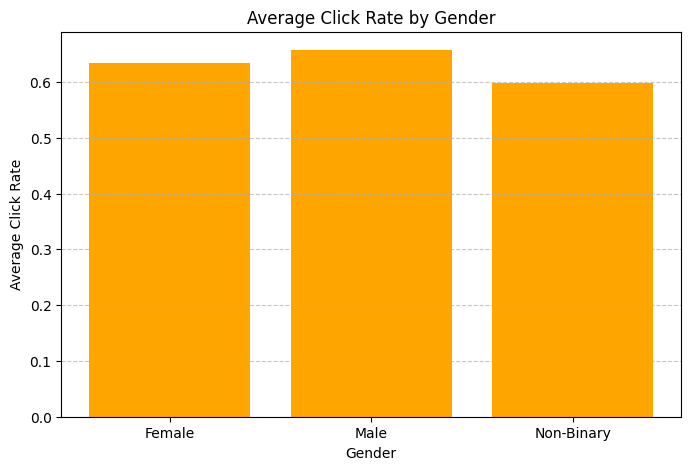

In [37]:
# Clicks distribution by gender
plt.figure(figsize=(8, 5))
gender_clicks = ad_data.groupby('gender')['click'].mean().reset_index()
plt.bar(gender_clicks['gender'], gender_clicks['click'], color='orange')
plt.title('Average Click Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

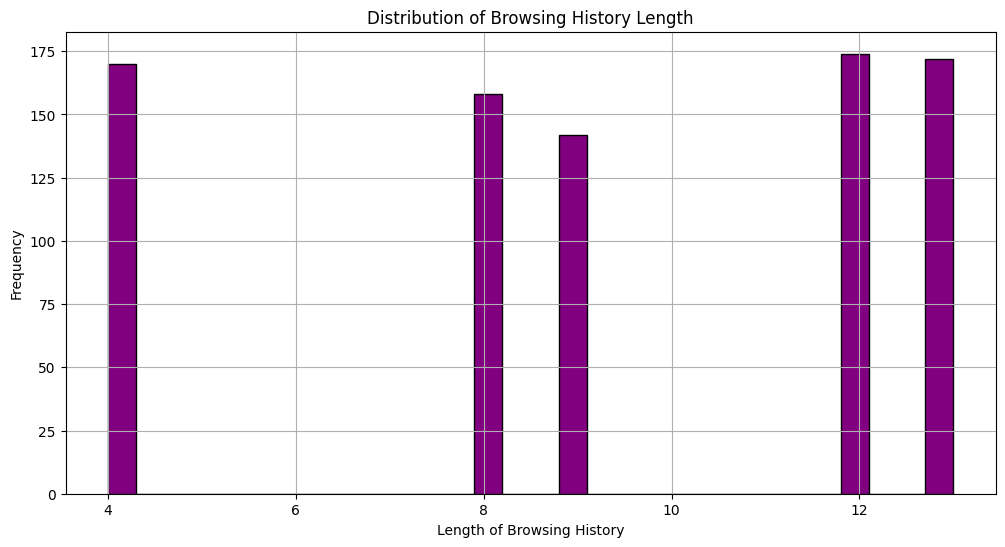

In [38]:
# Column for the length of browsing history
ad_data['browsing_history_length'] = ad_data['browsing_history'].apply(lambda x: len(str(x)))

# Histogram of browsing history lengths
plt.figure(figsize=(12, 6))
plt.hist(ad_data['browsing_history_length'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Browsing History Length')
plt.xlabel('Length of Browsing History')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

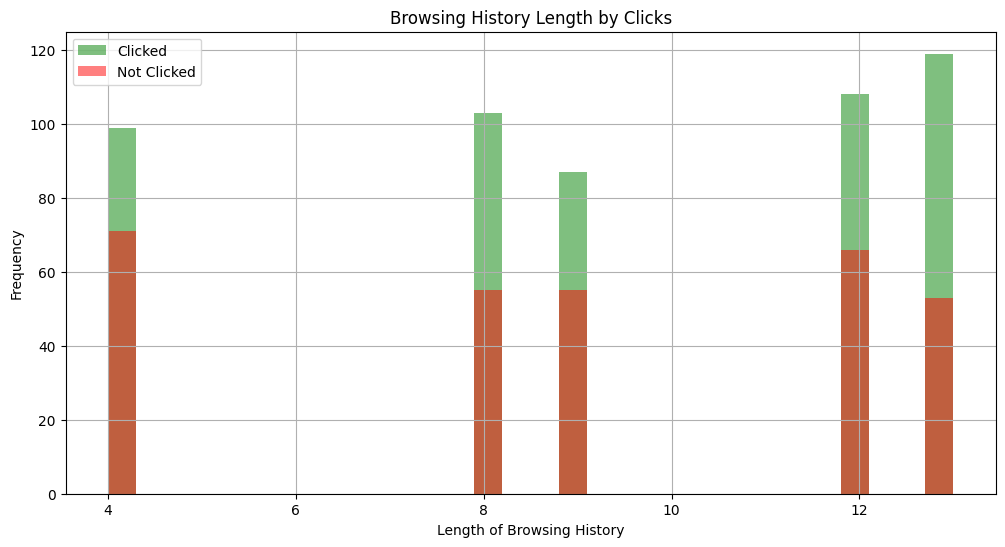

In [39]:
# Browsing history lengths by click
plt.figure(figsize=(12, 6))
plt.hist(ad_data[ad_data['click'] == 1]['browsing_history_length'], bins=30, alpha=0.5, label='Clicked', color='green')
plt.hist(ad_data[ad_data['click'] == 0]['browsing_history_length'], bins=30, alpha=0.5, label='Not Clicked', color='red')
plt.title('Browsing History Length by Clicks')
plt.xlabel('Length of Browsing History')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

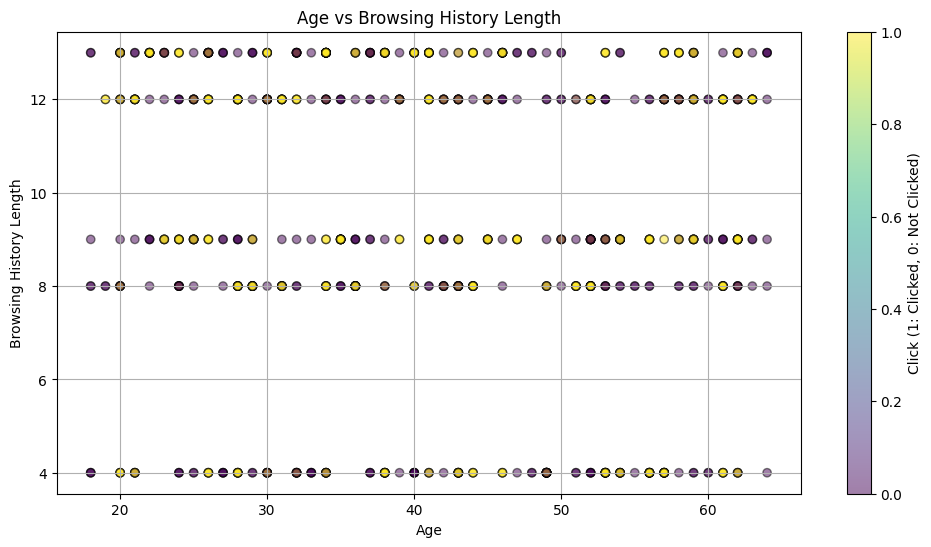

In [40]:
# Age vs browsing history length
plt.figure(figsize=(12, 6))
plt.scatter(ad_data['age'], ad_data['browsing_history_length'], alpha=0.5, c=ad_data['click'], cmap='viridis', edgecolor='k')
plt.title('Age vs Browsing History Length')
plt.xlabel('Age')
plt.ylabel('Browsing History Length')
plt.colorbar(label='Click (1: Clicked, 0: Not Clicked)')
plt.grid(True)
plt.show()

<ipython-input-41-c17382248e86>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_clicks = ad_data.groupby('time_of_day')['click'].sum().reset_index()


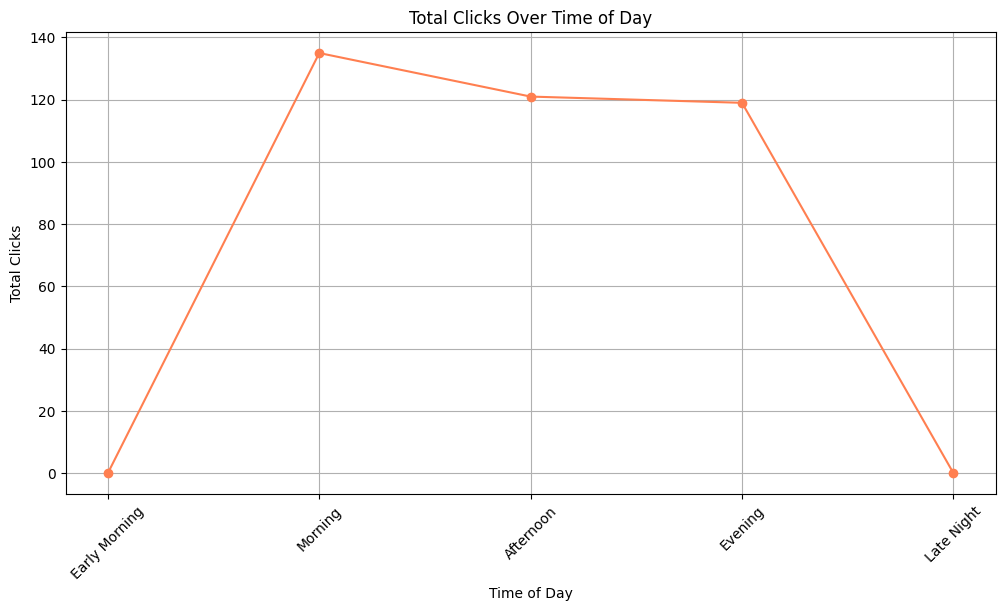

In [41]:
# Clicks over time of day
ad_data['time_of_day'] = pd.Categorical(ad_data['time_of_day'], categories=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night'], ordered=True)

time_clicks = ad_data.groupby('time_of_day')['click'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(time_clicks['time_of_day'], time_clicks['click'], marker='o', linestyle='-', color='coral')
plt.title('Total Clicks Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Clicks')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-62026e688e69>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_clicks = ad_data.groupby('age_group')['click'].mean().reset_index()


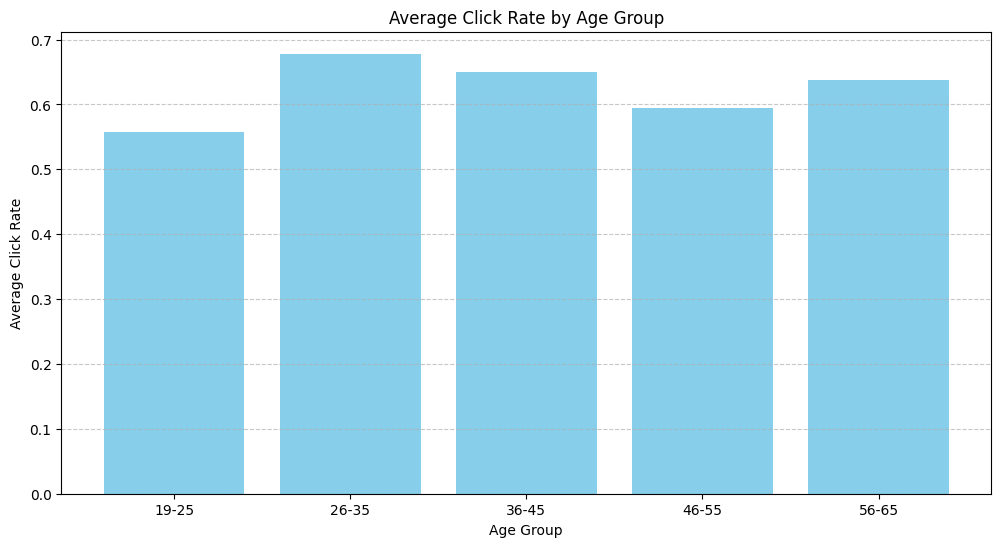

In [42]:
# Clicks by age group
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

ad_data['age_group'] = pd.cut(ad_data['age'], bins=bins, labels=labels, right=False)

# Clicks distribution by age group
plt.figure(figsize=(12, 6))
age_group_clicks = ad_data.groupby('age_group')['click'].mean().reset_index()
plt.bar(age_group_clicks['age_group'], age_group_clicks['click'], color='skyblue')
plt.title('Average Click Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

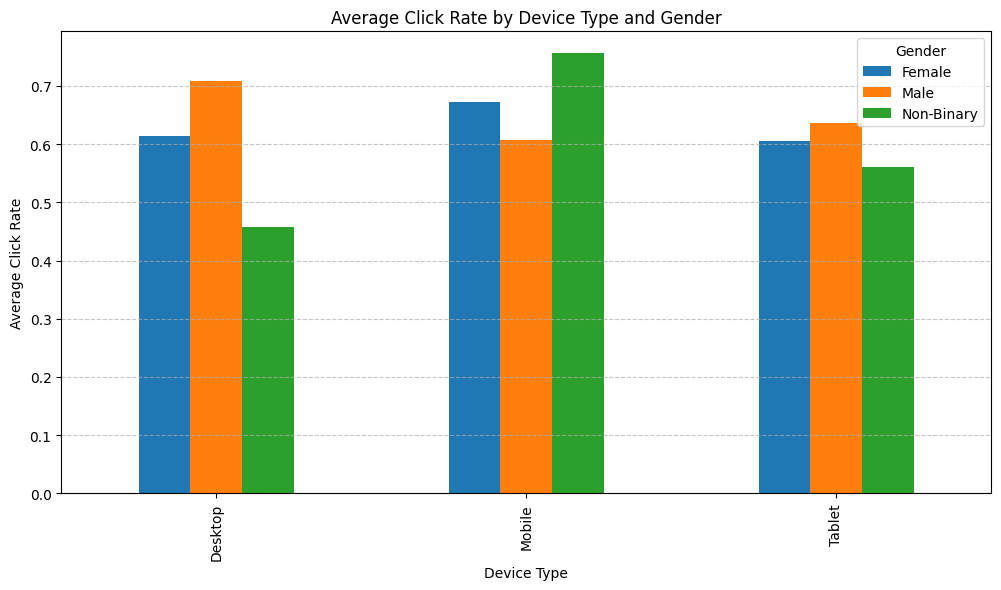

In [43]:
# Clicks distribution by device type and gender
plt.figure(figsize=(12, 6))
device_gender_clicks = ad_data.groupby(['device_type', 'gender'])['click'].mean().unstack()
device_gender_clicks.plot(kind='bar', figsize=(12, 6))
plt.title('Average Click Rate by Device Type and Gender')
plt.xlabel('Device Type')
plt.ylabel('Average Click Rate')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-44-8bc7a15de7e0>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_gender_age = ad_data.pivot_table(index='age_group', columns='gender', values='click', aggfunc='mean')


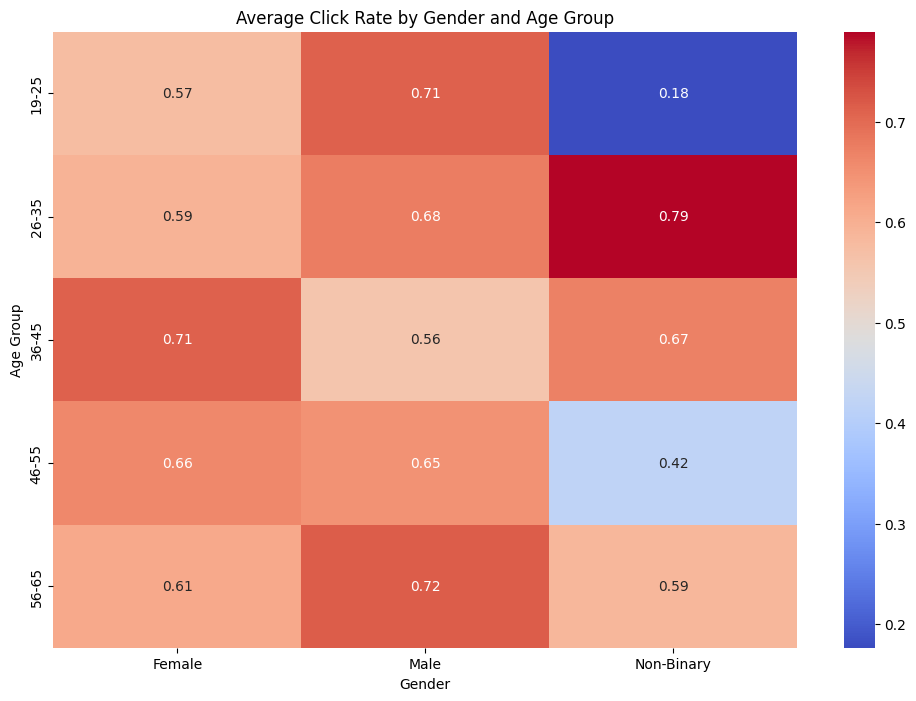

In [44]:
# Heatmap of Average Click Rate by Gender and Age Group
heatmap_data_gender_age = ad_data.pivot_table(index='age_group', columns='gender', values='click', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_gender_age, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Click Rate by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()